### Q1. Explain GET and POST methods.

**GET Method in Flask:**

When you define a route in Flask using `@app.route()`, you can specify the HTTP methods that the route should respond to. If you don't specify any methods, by default it will respond to GET requests.

Here's an example of a simple Flask application that responds to a GET request:

```python
from flask import Flask

app = Flask(__name__)

@app.route('/hello', methods=['GET'])
def hello():
    return 'Hello, GET request!'

if __name__ == '__main__':
    app.run(debug=True)
```

In this example, when a client sends a GET request to `/hello`, Flask executes the `hello()` function and returns the string `'Hello, GET request!'`. This is a basic demonstration of how you can handle GET requests in Flask.

**POST Method in Flask:**

To handle POST requests in Flask, you need to specify the `methods` parameter in the `@app.route` decorator with the value `['POST']`.

Here's an example of a Flask application that handles a POST request:

```python
from flask import Flask, request

app = Flask(__name__)

@app.route('/login', methods=['POST'])
def login():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']
        # Process the username and password (e.g., authenticate user)
        return f'Username: {username}, Password: {password}'
    else:
        return 'Only POST requests are allowed for this endpoint'

if __name__ == '__main__':
    app.run(debug=True)
```

In this example, when a client sends a POST request to `/login`, Flask captures the data sent by the client in the request body. We use `request.form` to access form data sent by the client. The `login()` function processes the username and password and returns a response.

**Summary:**

- GET requests are used to retrieve data from the server, and POST requests are used to send data to the server.
- In Flask, you can handle GET requests by default or explicitly specify it with `methods=['GET']`.
- To handle POST requests, you need to explicitly specify it with `methods=['POST']`.
- You can access data sent by the client in both GET and POST requests using the `request` object in Flask.

### Q2. Why is request used in Flask?

In Flask, the `request` object is used to access incoming request data sent by the client. It provides a convenient way to interact with various parts of an HTTP request, such as form data, query parameters, cookies, headers, and more. The primary reasons for using the `request` object in Flask are:

1. **Accessing Form Data:**
   - When a client submits an HTML form via a POST request, the form data is sent in the request body.
   - The `request.form` attribute allows you to access this form data as a dictionary-like object, where keys are the names of form fields and values are the submitted data.

2. **Handling Query Parameters:**
   - In GET requests, query parameters are appended to the URL.
   - The `request.args` attribute provides access to these query parameters, allowing you to retrieve and process them.

3. **Accessing Request Headers:**
   - Request headers contain additional information about the request, such as user agent, content type, and more.
   - The `request.headers` attribute allows you to access the headers sent by the client.

4. **Managing Cookies:**
   - Cookies are small pieces of data sent by the server and stored on the client's browser.
   - The `request.cookies` attribute provides access to the cookies sent by the client, allowing you to read and modify them.

5. **File Uploads:**
   - When handling file uploads in HTML forms, the files are sent as part of a POST request with the `multipart/form-data` content type.
   - The `request.files` attribute allows you to access uploaded files and save them to the server.

6. **Accessing Request Method:**
   - You can determine the HTTP method used in the request (GET, POST, etc.) through the `request.method` attribute.
   
7. **Working with Session Data:**
   - Flask uses sessions to store user-specific data across requests.
   - The `request.session` attribute allows you to access session data within a request handler.

By using the `request` object in Flask, you can effectively handle and process incoming request data, enabling your application to interact with clients and provide dynamic responses based on the received data. It simplifies the task of building web applications by abstracting away the complexities of HTTP request handling.

### Q3. Why is redirect() used in Flask?


 In Flask, the `redirect()` function is used to redirect the client's browser to a different URL. This function is particularly useful in web applications for various purposes, including:

1. **URL Redirection:**
   - Redirecting users to a different URL is a common requirement in web development.
   - For example, after a user successfully logs in, you might want to redirect them to their dashboard page.
   - The `redirect()` function allows you to specify the URL to which the client should be redirected.

2. **Handling Form Submissions:**
   - After processing a form submission, it's often a good practice to redirect the user to a different URL to avoid resubmitting the form if the user refreshes the page.
   - You can use `redirect()` to redirect users to a different page after form submission.

3. **Dynamic URL Generation:**
   - Flask provides the `url_for()` function for generating URLs for routes based on their endpoint name.
   - You can combine `redirect()` with `url_for()` to dynamically generate URLs and redirect users to specific routes.

4. **Handling Authentication and Authorization:**
   - In authentication workflows, you might need to redirect users to a login page if they attempt to access a protected resource without authentication.
   - Similarly, after successful authentication, you can redirect users back to the originally requested page.
   - Redirects can be used as part of authorization workflows to direct users based on their permissions.

5. **Error Handling and Error Pages:**
   - When encountering errors or exceptions in your application, you might want to redirect users to custom error pages or to a specific page for handling errors gracefully.

Here's a basic example demonstrating the usage of `redirect()` in Flask:

```python
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def index():
    # Redirect to the 'dashboard' route
    return redirect(url_for('dashboard'))

@app.route('/dashboard')
def dashboard():
    return 'Welcome to the dashboard!'

if __name__ == '__main__':
    app.run(debug=True)
```

In this example, accessing the root URL `/` will trigger a redirect to the `dashboard` route. The `url_for()` function is used to generate the URL for the `dashboard` route dynamically. When the user visits the root URL, they are redirected to the `dashboard` route, where they see the "Welcome to the dashboard!" message.

### Q4. What are templates in Flask? Why is the render_template() function used?

In Flask, templates are used to generate dynamic HTML content that can be returned as responses to client requests. Templates allow you to separate the presentation (HTML) from the application logic (Python code), promoting cleaner and more maintainable code. The `render_template()` function is used to render these templates and return them as responses.

Here's a breakdown of templates in Flask and the purpose of the `render_template()` function:

1. **Purpose of Templates:**
   - Templates in Flask are typically HTML files with placeholders, called template variables or template expressions, that are replaced with actual values during rendering.
   - They can also contain control structures like loops and conditionals using template tags (e.g., `{% for %}`, `{% if %}`) to dynamically generate HTML content.
   - By using templates, you can create reusable and modular HTML layouts, reducing code duplication and improving maintainability.

2. **Creating Templates:**
   - Templates in Flask are usually stored in a directory named `templates` in the Flask application directory.
   - You can use template engines like Jinja2, which is integrated with Flask by default, to render templates. Jinja2 provides powerful features for template inheritance, macros, filters, and more.

3. **Rendering Templates with `render_template()`:**
   - The `render_template()` function is used to render templates and return them as responses to client requests.
   - It takes the name of the template file (and optionally, any variables to pass to the template) as arguments.
   - Flask automatically looks for templates in the `templates` directory, so you only need to specify the filename without the full path.

Here's an example demonstrating the usage of `render_template()` in Flask:

```python
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():
    # Render the 'index.html' template
    return render_template('index.html', title='Home', message='Welcome to the homepage!')

if __name__ == '__main__':
    app.run(debug=True)
```

In this example, when a client requests the root URL `/`, Flask renders the `index.html` template located in the `templates` directory. The `title` and `message` variables are passed to the template and can be accessed within the template for dynamic content generation.

Overall, templates in Flask allow you to create dynamic and interactive web pages by separating the presentation layer from the application logic, and the `render_template()` function facilitates this process by rendering templates and passing data to them.

### Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

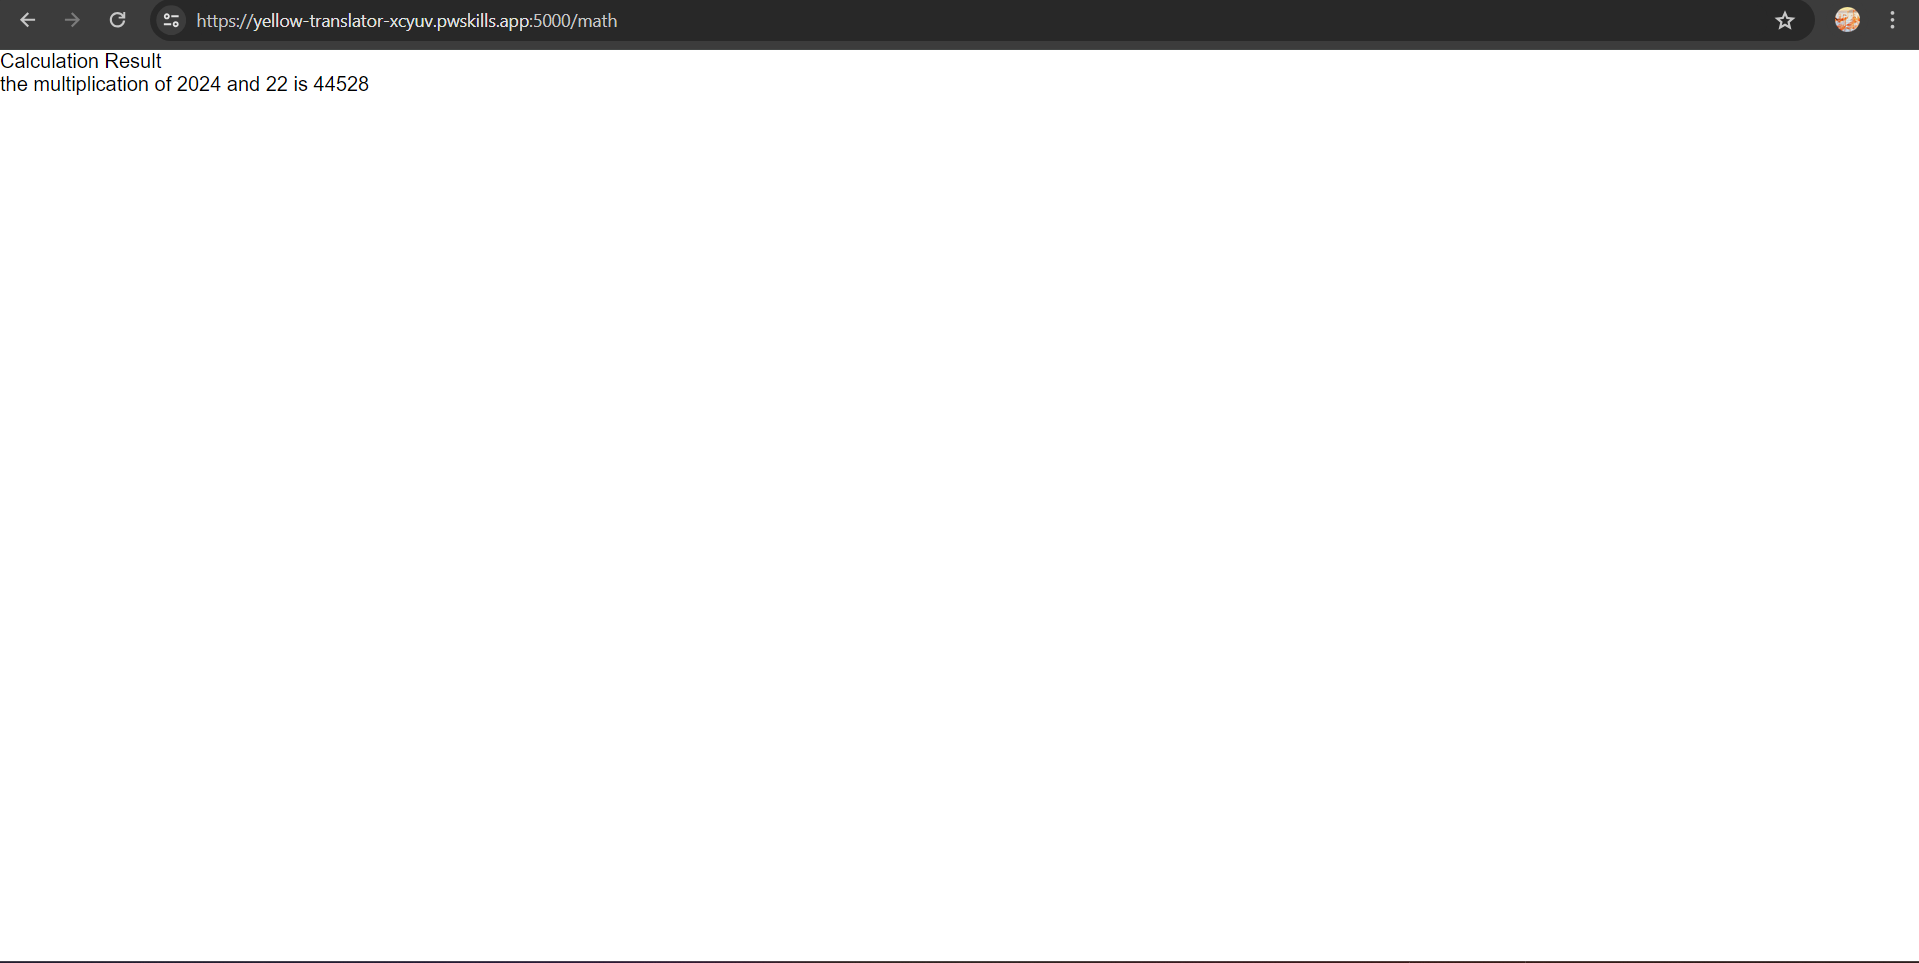

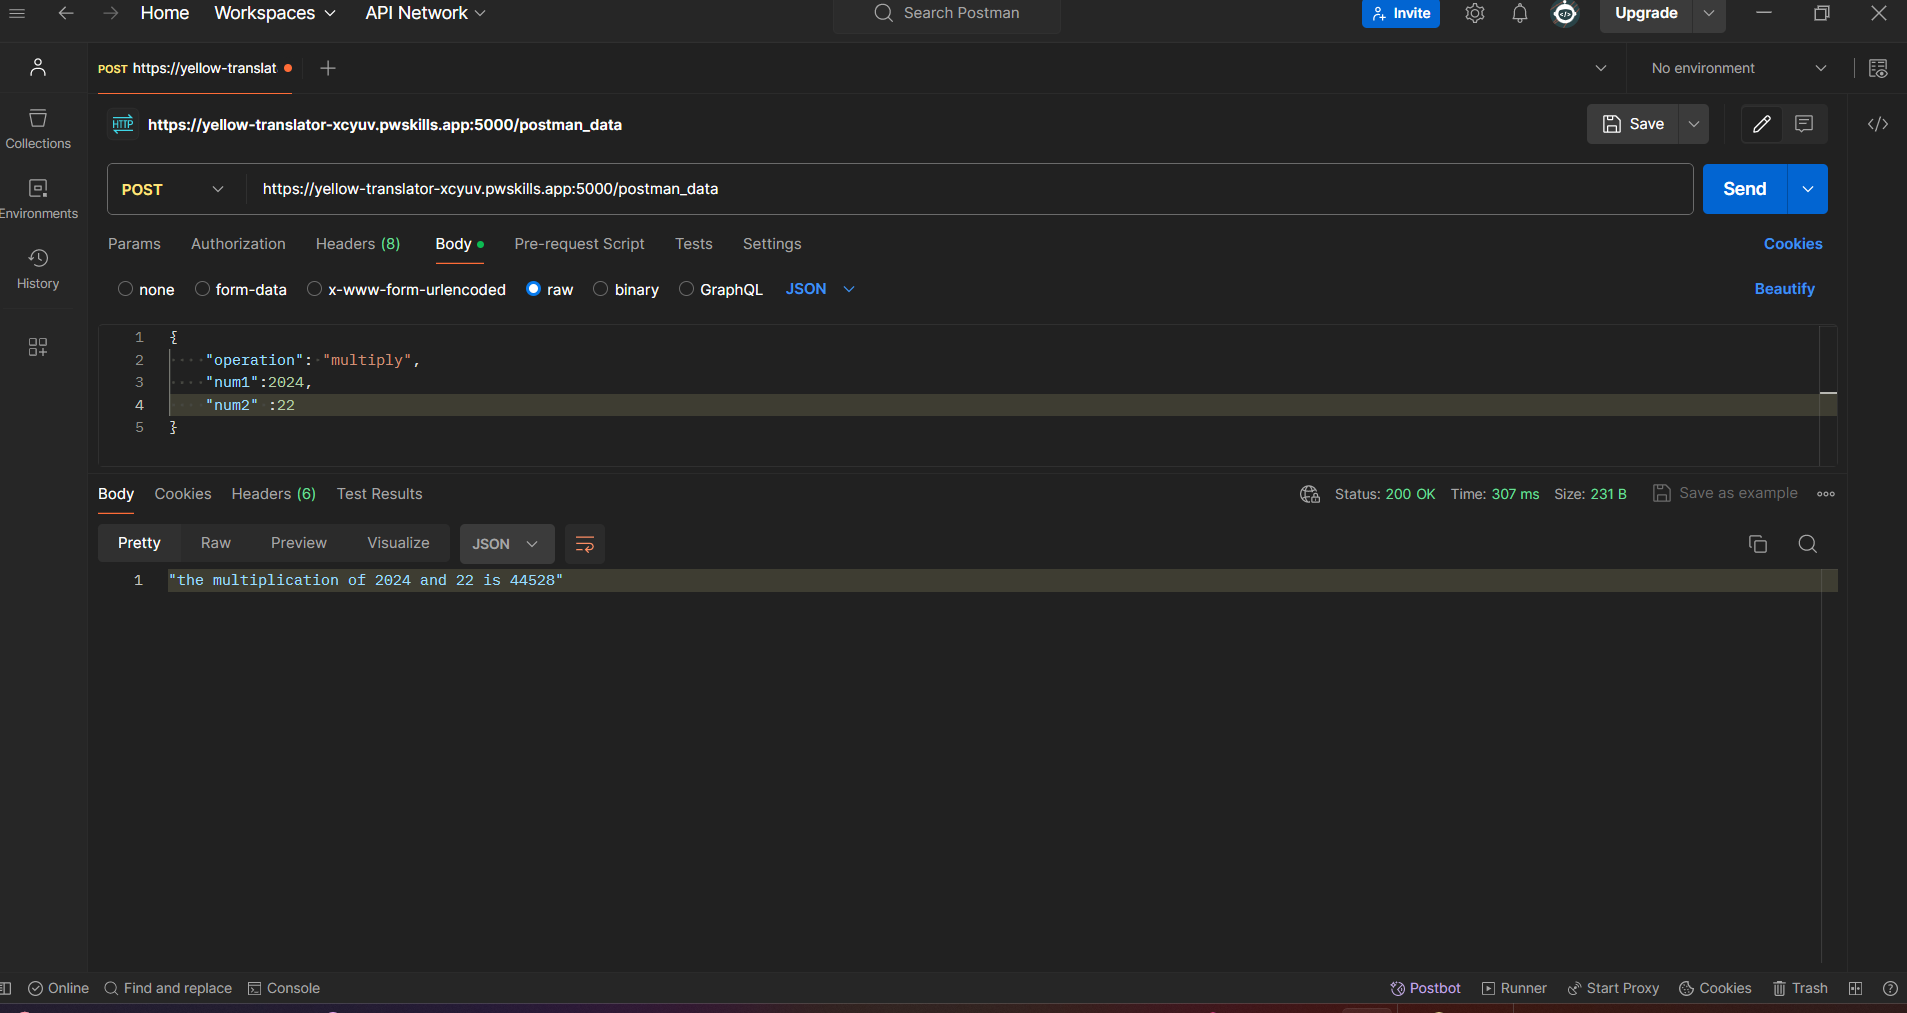